In [1]:
# Import Libraries

import os, random, shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Dataset Splitting

src = r"C:\Users\ramit\OneDrive\Desktop\corn_project\dataset"  # original folder
dst = r"C:\Users\ramit\OneDrive\Desktop\corn_project\dataset_Split"
os.makedirs(dst + "\\train", exist_ok=True)
os.makedirs(dst + "\\test", exist_ok=True)

for cls in os.listdir(src):
    imgs = os.listdir(os.path.join(src, cls))
    random.shuffle(imgs)
    split = int(0.8 * len(imgs))
    for i, img in enumerate(imgs):
        folder = "train" if i < split else "test"
        path = os.path.join(dst, folder, cls)
        os.makedirs(path, exist_ok=True)
        shutil.copy(os.path.join(src, cls, img), os.path.join(path, img))
print("Split into train/ and test/ Done")

Split into train/ and test/ Done


In [4]:
# Data Preprocessing & Augmentation

train_dir = dst + "/train"
test_dir  = dst + "/test"
IMG_SIZE = (128,128)

train_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=32, subset='training')
val_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=32, subset='validation')
test_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=1, shuffle=False)

Found 3324 images belonging to 4 classes.
Found 830 images belonging to 4 classes.
Found 2042 images belonging to 4 classes.


In [5]:
# Build CNN Model

model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train model

history = model.fit(train_data, validation_data=val_data, epochs=15)

C:\Users\ramit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 88s 828ms/step - accuracy: 0.7332 - loss: 0.6558 - val_accuracy: 0.8506 - val_loss: 0.3806
Epoch 2/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 31s 296ms/step - accuracy: 0.8237 - loss: 0.4544 - val_accuracy: 0.8265 - val_loss: 0.4465
Epoch 3/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.8445 - loss: 0.4071 - val_accuracy: 0.8711 - val_loss: 0.3023
Epoch 4/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - accuracy: 0.8658 - loss: 0.3542 - val_accuracy: 0.8614 - val_loss: 0.2786
Epoch 5/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step - accuracy: 0.8809 - loss: 0.2993 - val_accuracy: 0.8711 - val_loss: 0.3006
Epoch 6/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.8842 - loss: 0.2765 - val_accuracy: 0.8747 - val_loss: 0.2965
Epoch 7/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 27s 262ms/step - accuracy: 0.9049 - loss: 0.2351 - val_accuracy: 0.9012 - val_loss: 0.2465
Epoch 8/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9143 - loss: 0

In [7]:
# Evaluate model

loss, acc = model.evaluate(test_gen)
print(f"Accuracy: {acc*100:.2f}%")

2042/2042 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9584 - loss: 0.1142
Accuracy: 95.84%


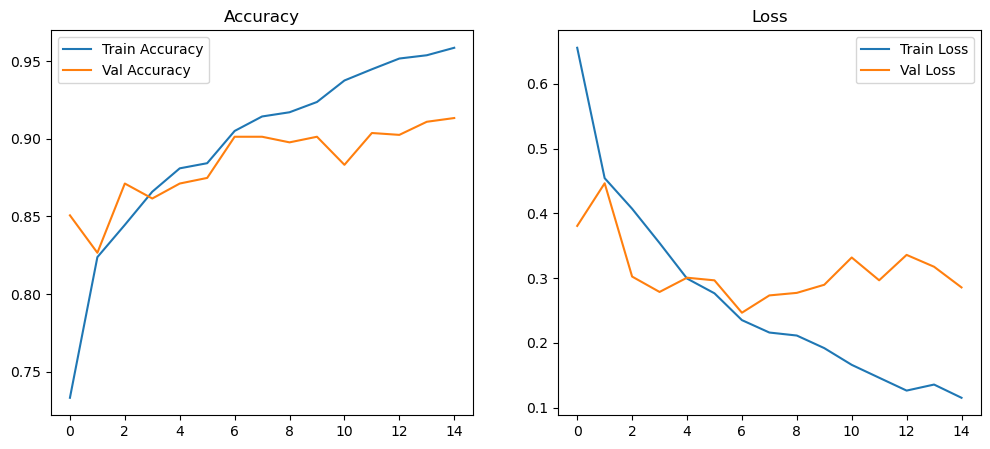

In [8]:
# Plot Accuracy & loss graph

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

2042/2042 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step


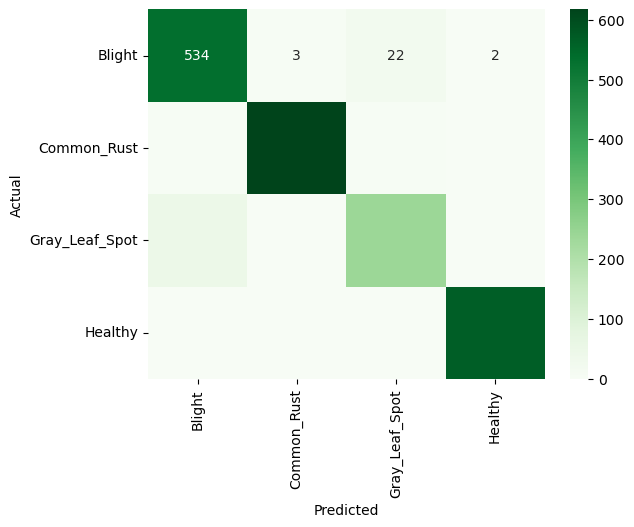

                precision    recall  f1-score   support

        Blight       0.91      0.95      0.93       561
   Common_Rust       1.00      0.99      0.99       626
Gray_Leaf_Spot       0.91      0.83      0.87       288
       Healthy       1.00      1.00      1.00       567

      accuracy                           0.96      2042
     macro avg       0.95      0.94      0.95      2042
  weighted avg       0.96      0.96      0.96      2042



In [9]:
# Evaluation metrics & Report

y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
labels = list(test_gen.class_indices.keys())

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted"); 
plt.ylabel("Actual"); 
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))

In [11]:
# Save Model

model.save("C:/Users/ramit/OneDrive/Desktop/corn_project/corn_leaf_cnn_model.keras")
print("Model saved successfully!")

Model saved successfully!
